<br>

# Obtaining the bi-objetive Pareto Front (Markowitz) using ev-MOGA

2 objectives

<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io import savemat

import time

In [2]:
import evmoga as ev
from evmoga import portfolio_selection_user_functions as uf
from evmoga import utilities as evu

ev-MOGA package initialized.


## Import data to define the optimization problem

Description and other information about the data:

In [ ]:
dataset = "Eurostoxx50"
# dataset = "DowJones"
# dataset = "FTSE100"
# dataset = "NASDAQ100"
# dataset = "SP500"

excel_input_data = "./Datasets/Datasets_Sustainability/" + dataset + ".xlsx"

price_sheet_name = "AssetPrices"
esg_sheet_name = "ESG"

description = 'Mean-Variance (2 objectives) - ' + dataset
objectives = ["Mean return", "Variance"]
signs = [-1, +1] # -1: maximize, +1: minimize

Options:

In [ ]:
save_results = True
mat_folder = "./mat_files/"
mat_filename = mat_folder + "evMOGApy_" + dataset + "_2obj.mat" 

Daily and mean returns:

In [4]:
df = pd.read_excel(excel_input_data, sheet_name=price_sheet_name, index_col=0).dropna(axis=1)
df = df.pct_change(axis=0).dropna(axis=0)
# display(df)

returns = df.values.T
print(f"Returns shape = {returns.shape}")

mean_r = returns.mean(axis=1)
cov_Mtrx = np.cov(returns)
print(f"Shape of Covariance matrix = {cov_Mtrx.shape}")

Returns shape = (45, 3713)
Shape of Covariance matrix = (45, 45)


## Setting-up and running ev-MOGA

In [5]:
n_obj = len(signs) # Number of objectives
n_var = mean_r.shape[0] # Number of decision variables

eMOGA = {
    
    'description': description,
    'objectives': objectives,
    
    'objfun': uf.objective_function_2obj,
    'iterationfun': uf.fun_iteration,
    'resultsfun': uf.fun_results,
    'constraintfun': uf.sum1,

    'objfun_dim': n_obj,
    'searchSpace_dim': n_var,
    'searchspaceUB': np.ones(n_var),
    'searchspaceLB': np.zeros(n_var),
    
    'Nind_P': int(5000),
    'Generations': int(200),    
    'Nind_GA': int(200),
    'n_div': [200 for i in range(n_obj)],

    'param': {
        'signs': signs,
        'mean_r': mean_r,
        'ret': returns,
        'cov_Mtrx': cov_Mtrx,
    },

    'Sigma_Pm_ini': 20.0,
    'Sigma_Pm_fin': 0.1,

    'Pm': 0.5,
    'randseed': 12345,

    'precision_onoff': True,
    'precision': 0.001,

    'save_results': save_results,
    'mat_file': mat_filename,

    'Nit': 10,
    'time_Nit_gen': [],
    'Nind_A_Nit_gen': [],
}

eMOGA = uf.generate_P0(eMOGA)

eMOGA = ev.MOGA(eMOGA)


--------------------------------------------------------

Generating user-defined initial population P(0) with 5000 individuals



100%|██████████| 5000/5000 [00:01<00:00, 3042.47it/s]



--------------------------------------------------------

Initializing ev-MOGA algorithm...

Initial population P(0) with 5000 individuals found
No new solutions needed

Estimating value functions of P(0)

Estimating the initial e-Pareto front A(0):
      - Marking non-dominated solutions...
      - Selecting epsilon-non-dominated solutions...


	100%|██████████|



Iterating process searching for e-Pareto front...

Generations: 0 out of 200. Nind_A = 18 (elapsed time: 0.0 s)
Generations: 10 out of 200. Nind_A = 36 (elapsed time: 0.7 s)
Generations: 20 out of 200. Nind_A = 49 (elapsed time: 0.7 s)
Generations: 30 out of 200. Nind_A = 68 (elapsed time: 0.7 s)
Generations: 40 out of 200. Nind_A = 60 (elapsed time: 0.7 s)
Generations: 50 out of 200. Nind_A = 63 (elapsed time: 0.8 s)
Generations: 60 out of 200. Nind_A = 76 (elapsed time: 0.7 s)
Generations: 70 out of 200. Nind_A = 83 (elapsed time: 0.7 s)
Generations: 80 out of 200. Nind_A = 86 (elapsed time: 0.9 s)
Generations: 90 out of 200. Nind_A = 81 (elapsed time: 0.8 s)
Generations: 100 out of 200. Nind_A = 80 (elapsed time: 0.7 s)
Generations: 110 out of 200. Nind_A = 89 (elapsed time: 0.7 s)
Generations: 120 out of 200. Nind_A = 85 (elapsed time: 0.7 s)
Generations: 130 out of 200. Nind_A = 95 (elapsed time: 0.7 s)
Generations: 140 out of 200. Nind_A = 90 (elapsed time: 0.7 s)
Generations: 1

## Plotting results

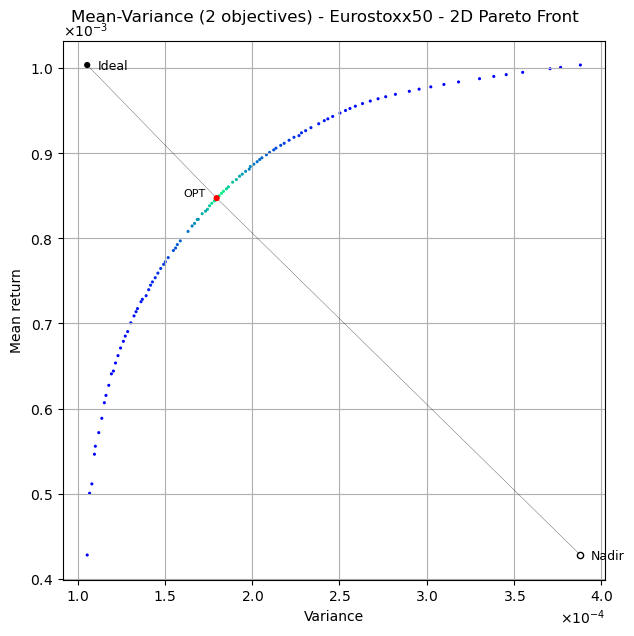

(<Figure size 850x467.5 with 2 Axes>,
 array([<Axes: xlabel='Mean return', ylabel='Normalized distance'>,
        <Axes: xlabel='Variance'>], dtype=object))

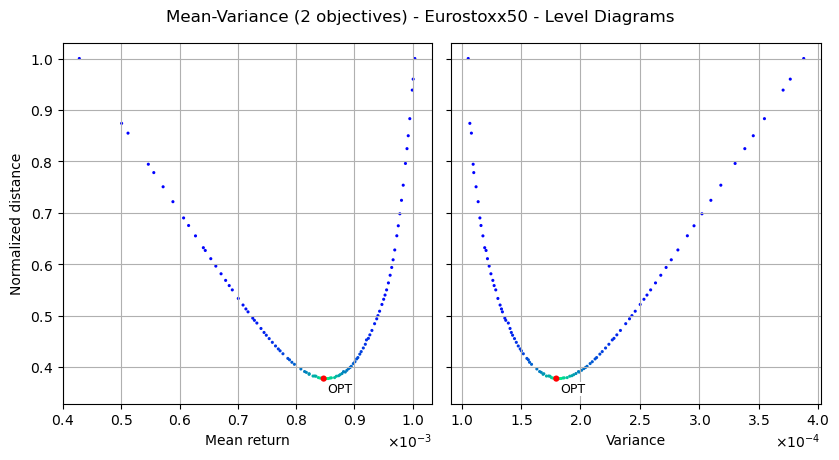

In [6]:
dot_size_2D = 20
opt_dot_size_factor_2D = 4

eMOGA['signs'] = np.array(eMOGA['param']['signs'])
cmap = 'winter'

if 'graph options' not in eMOGA:
    eMOGA['graph options'] = dict()
eMOGA['graph options']['obj_ord_3D'] = [1, 2, 0]
eMOGA['graph options']['dot_size_2D'] = dot_size_2D
eMOGA['graph options']['opt_dot_size_factor_2D'] = opt_dot_size_factor_2D

evu.plot_Pareto_Front(eMOGA, plot_optims=True)
# evu.plot_2D_projections(eMOGA)
evu.plot_Level_Diagrams(eMOGA, plot_params_LD=False)

## Saving additional information to eMOGA structure

In [7]:
if eMOGA['save_results']:
    savemat(eMOGA['mat_file'], eMOGA)

## Exploring results

Optimum:

In [8]:
k = [i for i in range(len(eMOGA['profiles'])) if eMOGA['profiles'][i]['Name'] == 'Optimum']
if k:
	print(f"Optimum:\n")
	j = [i for i in range(len(eMOGA['profiles'][k[0]]['x'])) if eMOGA['profiles'][k[0]]['x'][i] > 0]
	for i in j:
		print(f"x_{i} = {eMOGA['profiles'][k[0]]['x'][i]:.3f} ({df.columns[i]})")
	print(f"\nz = {(eMOGA['profiles'][k[0]]['z'])}")
else:
	print("No 'Optimum' profile found")

Optimum:

x_1 = 0.371 (19.6249)
x_2 = 0.002 (80.1)
x_28 = 0.158 (9.4925)
x_29 = 0.042 (8.3765)
x_32 = 0.119 (37.6)
x_43 = 0.308 (14.207)

z = [0.00084714 0.00017969]
